In [1]:
import gzip, os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras import layers
from keras.optimizers import Adam
from keras.utils import to_categorical
%matplotlib inline
%load_ext autoreload

Using TensorFlow backend.


# Load the test data from MNIST

In [2]:
def load_data(filename, num_images=60000):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(28 * 28 * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images, 28, 28, 1)
        mean = np.mean(data, axis=0)
        data -= mean
    return data

def load_label(filename, num_images=60000):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(num_images)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

data = load_data(os.path.join('data', 'train-images-idx3-ubyte.gz'))
print(data.shape)
labels = load_label(filename = os.path.join('data', 'train-labels-idx1-ubyte.gz'))
print(labels.shape)

(60000, 28, 28, 1)
(60000,)


In [3]:
test_data = load_data(os.path.join('data', 't10k-images-idx3-ubyte.gz'), num_images=10000)
print(test_data.shape)
test_labels = load_label(os.path.join('data', 't10k-labels-idx1-ubyte.gz'), num_images=10000)
print(test_labels.shape)

(10000, 28, 28, 1)
(10000,)


### Split the training set to training and validation
Shuffle the indicies and a random training set and random validation set

In [4]:
encoded_labels = to_categorical(labels)

indicies = np.arange(data.shape[0])
np.random.shuffle(indicies)

data = data[indicies]
encoded_labels = encoded_labels[indicies]

num_trains = int(.8 * data.shape[0])

mask = range(num_trains)
train_data = data[mask]
train_labels = encoded_labels[mask]

mask = range(num_trains, data.shape[0])
val_data = data[mask]
val_labels = encoded_labels[mask]

print(train_data.shape, val_data.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1)


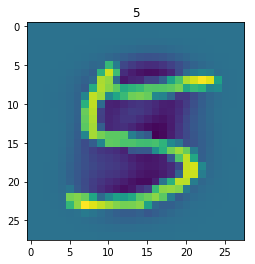

In [5]:
n = np.random.choice(train_data.shape[0])
plt.imshow(train_data[n].reshape(28,28))
plt.title(np.argmax(train_labels[n]))

# Define Keras model
Similar model as Tensorflow

CONV3 - MAX POOL - CONV3 - MAX POOL - FC

In [6]:
model = Sequential()

model.add(Conv2D(filters=10, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
model.add(Conv2D(filters=10, kernel_size=3, strides=1, padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
model.add(Flatten())
model.add(Dense(units=10, activation="softmax"))

adam = Adam(lr=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

### Fit the model
Run 5 epochs

In [7]:
model.fit(
    train_data, 
    train_labels, 
    batch_size=32, 
    epochs=5, 
    validation_data=(val_data, val_labels)
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 11s - loss: 6.1597 - acc: 0.5928 - val_loss: 0.3547 - val_acc: 0.9321
Epoch 2/5
48000/48000 [==============================] - 9s - loss: 0.2009 - acc: 0.9512 - val_loss: 0.1397 - val_acc: 0.9626
Epoch 3/5
48000/48000 [==============================] - 9s - loss: 0.1064 - acc: 0.9700 - val_loss: 0.1149 - val_acc: 0.9677
Epoch 4/5
48000/48000 [==============================] - 9s - loss: 0.0837 - acc: 0.9745 - val_loss: 0.1077 - val_acc: 0.9721
Epoch 5/5
48000/48000 [==============================] - 9s - loss: 0.0740 - acc: 0.9774 - val_loss: 0.0867 - val_acc: 0.9767


# Run against the test set

In [8]:
encoded_test_labels = to_categorical(test_labels)

In [9]:
model.evaluate(test_data, encoded_test_labels, batch_size=64)

 9152/10000 [==========================>...] - ETA: 0s

[0.080617253285669724, 0.97719999999999996]

In [10]:
preds = model.predict(test_data, batch_size=128)

In [11]:
print(np.argmax(preds[100:120],axis=1))
print(test_labels[100:120])

[6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 4 4 4 9 2]
[6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 4 4 4 9 2]
